In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense

conversion model using neural networks to convert centimeters (cm) to inches

In [14]:
# Define the input data (cm) and target data (inches)
cm_data = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], dtype=float)
inch_data = np.array([0.393701, 1.968504, 3.937008, 5.905512, 7.874016, 9.842520, 11.811024, 13.779528, 15.748032, 17.716536, 19.685040], dtype=float)


In [15]:
model = Sequential()

In [16]:
layer_0 = Dense(units=1, input_shape=[1])
model.add(layer_0)

In [17]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from sklearn.model_selection import train_test_split
cm_train, cm_test, inch_train, inch_test = train_test_split(cm_data, inch_data, test_size=0.2, random_state=42)

In [19]:
history = model.fit(x=cm_data, y=inch_data, epochs=1000, verbose=True)

Epoch 1/1000
1/1 [==============================] - 1s 944ms/step - loss: 981.7058
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 800.2812
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 637.9908
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 495.0648
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 371.5677
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 267.3503
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 182.0067
Epoch 8/1000
1/1 [==============================] - 0s 20ms/step - loss: 114.8283
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 64.7601
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 30.3734
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.8612
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.0698
Epoch 13/1000
1/1 [=

In [20]:
inch_predictions = model.predict(cm_test)

1/1 [==============================] - 0s 125ms/step


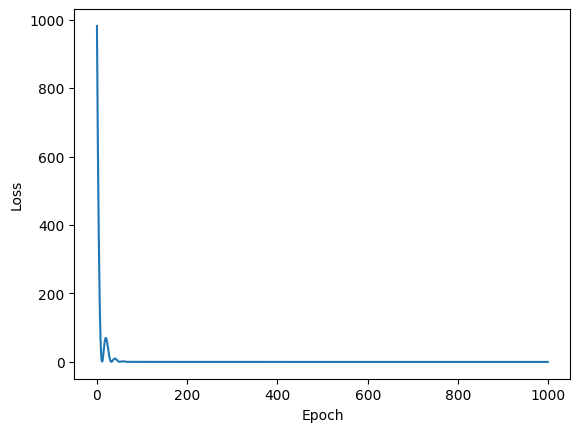

In [21]:
# Plot the loss during training
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [22]:
cm_to_convert = 55
converted_inches = model.predict([cm_to_convert])
print(f"{cm_to_convert} centimeters is approximately {converted_inches[0][0]:.4f} inches")

1/1 [==============================] - 0s 109ms/step
55 centimeters is approximately 21.6535 inches


In [23]:
print("These are the layer variables: " + str(layer_0.get_weights()))

These are the layer variables: [array([[0.39370084]], dtype=float32), array([-1.1483962e-06], dtype=float32)]
